# SVM Assignment

## Dataset Description

In [11]:
# lets get some intro out of way

## library imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

In [12]:
## data import 
dataset = pd.read_csv('creditcard.csv', sep=',')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [14]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
dataset.shape

(284807, 31)

In [17]:
dataset.groupby('Class').describe()

Amount                                                              \
          count        mean         std  min   25%    50%     75%       max   
Class                                                                         
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16   
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87   

           Time                  ...            V8                   V9  \
          count          mean    ...           75%        max     count   
Class                            ...                                      
0      284315.0  94838.202258    ...      0.326200  18.709255  284315.0   
1         492.0  80746.806911    ...      1.764879  20.007208     492.0   

                                                                              
           mean       std        min       25%       50%      75%        max  
Class                                                                         
0      0.004467  1.089372  -6.290730 -0.640412 -0.049964  0.59823  15.594995  
1     -2.581123  2.500896 -13.434066 -3.872383 -2.208768 -0.78785   3.353525  

[2 rows x 240 columns]

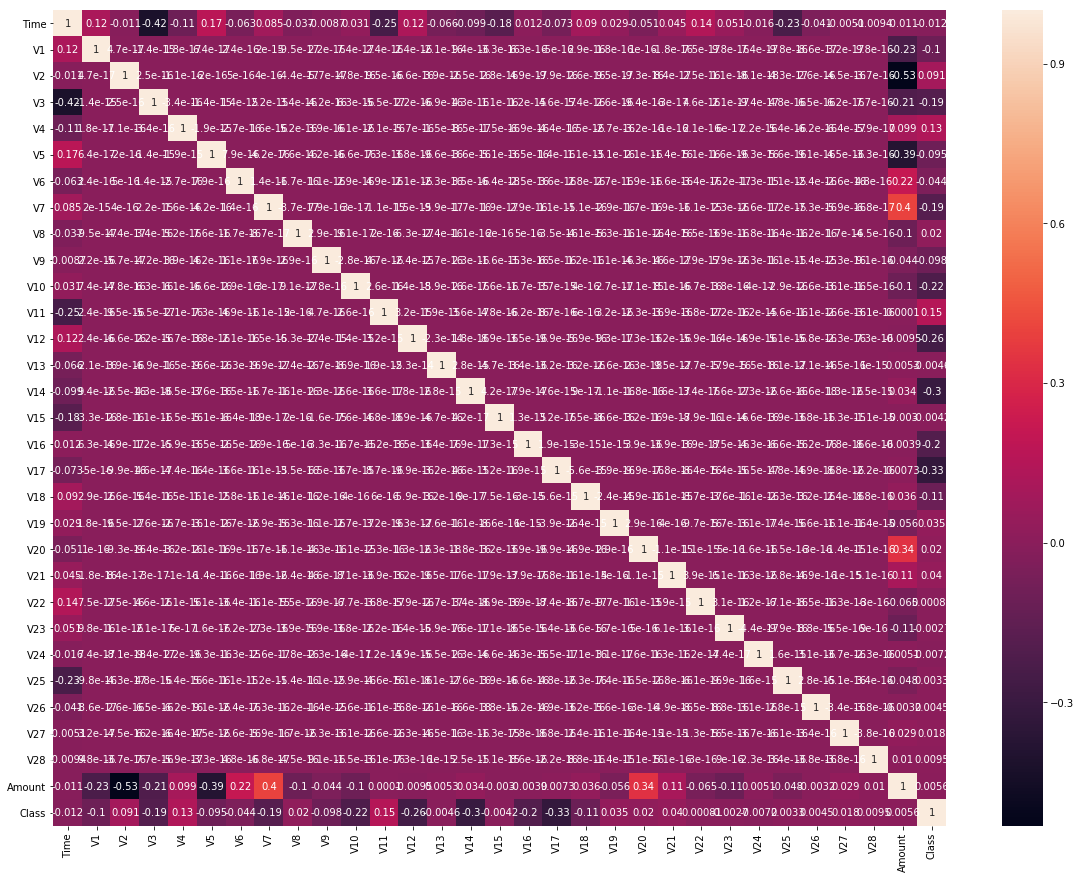

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()
#this heatmap really doesn't help much with the data obscurified, but it might be helpful later on...

This dataset is a set of 284,807 credit card transactions, one of which is the 'initial' transaction. Of these transactions, 492 are flagged as fraudulant.
<br>This dataset is definitely obscurified using a transformation of the features.
<br><br>The features are as follows:
<br><br><b>Time</b>: This is the amount of time in second between the current transaction and the first transaction in the set.
<br><br><b>V1-V28</b>: These are features that have to do with the transaction. I want to give more info but after a glance at the Kaggle page, this info has been obscurified using a Principle Component Analysis (PCA) transformation. These values are relevant, but I'm not sure how.
<br><br><b>Amount</b>: The total of the transaction.
<br><br><b>Class</b>: This is a true/false binary. 1 if fraudulant, 0 if not.


## Preprocessing

In [19]:
#before anything, check for null
dataset.isnull().values.any()
#okay, it's false, the data is decently clean

False

In [20]:
# the fraud to not fraud ratio is heavily skewed, so I'm going to rebalanca the dataset to even things up
nFraud = fraud = dataset[dataset.Class==0]
fraud = dataset[dataset.Class==1]

fraud_resample = resample(fraud, replace=True, n_samples=len(nFraud))

data= pd.concat([nFraud, fraud_resample])
data.Class.value_counts()


1    284315
0    284315
Name: Class, dtype: int64

In [21]:
#seperate into training/testing data
X = data.iloc[:,0:29].values
y = data.iloc[:,30].values

In [23]:
#verifying everything translated correctly in the train_test_split
print(X_train)
print(X_train.shape)
print(X_test)
print(X_test.shape)
print(y_train)
print(y_train.shape)
print(y_test)
print(y_test.shape)

[[ 1.34769000e+05 -9.67767137e-01  2.09801863e+00 ...  9.81333586e-02
   9.56768781e-01  1.62777346e-01]
 [ 1.43339000e+05  5.93092957e-01 -5.00076502e-01 ... -1.24419150e-01
   1.82093437e-01  3.35791703e-01]
 [ 6.00740000e+04 -1.49408893e+00 -1.39651055e-01 ...  3.38364843e-01
   7.01070512e-02 -3.03333435e-01]
 ...
 [ 1.29575000e+05 -1.13277600e+00 -1.30627563e-01 ... -1.36355649e-01
  -4.91091288e-02  5.78438277e-02]
 [ 8.42040000e+04 -9.37843305e-01  3.46288949e+00 ...  1.16578389e+00
   1.37449533e+00  7.29889342e-01]
 [ 8.87800000e+03 -2.66180217e+00  5.85639321e+00 ...  4.13195532e-01
   2.80284157e-01  3.03936551e-01]]
(2274, 29)
[[ 4.11160000e+04 -3.60054350e+00  4.51904695e+00 ...  8.27658675e-03
   2.05352425e+00  8.35749003e-01]
 [ 9.15240000e+04  1.95485174e+00  1.63005630e+00 ... -5.70709267e-01
   2.56187203e-02  8.18803892e-02]
 [ 4.27200000e+03  1.01263332e+00  1.85474949e-01 ...  7.37273076e-02
   2.46265602e-02  2.33611143e-02]
 ...
 [ 6.23410000e+04 -5.26775974e+00

In [32]:
#train test split with a split of 80/20 train/test and a random state of 42 just for good effect
#This is for Linear and RBF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.001, train_size = 0.004, random_state = 42)

#This is for poly
X_train_condense, X_test_condense, y_train_condense, y_test_condense = train_test_split(X, y, test_size = 0.000005, train_size = 0.00002, random_state = 42)

In [24]:
#verifying everything translated correctly in the train_test_split
print(X_train_condense)
print(X_train_condense.shape)
print(X_test_condense)
print(X_test_condense.shape)
print(y_train_condense)
print(y_train_condense.shape)
print(y_test_condense)
print(y_test_condense.shape)

[[ 8.22890000e+04 -1.46489655e+00  1.97552753e+00 -1.07714454e+00
   2.81919064e+00  6.98502284e-02 -7.89043630e-01 -1.19610145e+00
   6.73654375e-01 -1.36372388e+00 -2.93289526e+00  3.01368830e-01
  -3.24614144e+00 -4.65640148e-01 -5.42936188e+00 -1.30498292e+00
  -9.53623443e-01 -2.72734300e+00 -6.36436919e-01 -9.27124073e-01
   4.89688003e-02  1.74099466e-01 -2.72505290e-01 -3.15494504e-02
  -4.06165930e-01  1.57768980e-01 -1.04392920e-01  7.37955600e-02
  -4.15702518e-02]
 [ 2.81430000e+04 -2.71436784e+01  1.53658044e+01 -2.84074245e+01
   6.37089535e+00 -2.00878776e+01 -4.66631306e+00 -1.87094788e+01
   1.79035744e+01 -3.72227874e+00 -8.12096174e+00  4.41994346e+00
  -6.21094112e+00  1.06383740e+00 -5.84352838e+00 -1.08836449e-01
  -5.60659733e+00 -1.17562556e+01 -4.71494676e+00  7.83577594e-01
   1.70388765e+00  1.79682639e+00 -1.96097372e+00 -9.02247452e-01
   1.44011442e-01  2.02438804e+00 -2.04214066e-01  1.33215306e+00
   3.85890728e-01]
 [ 7.70670000e+04  1.20589852e+00  5.3

## Implementation

### Linear

In [38]:

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


In [39]:
# SVM Classifier model
#the hyperparameter control the margin violations
#smaller C leads to more margin violations but wider street
#C can be inferred
svm_clf_lin = SVC(kernel="linear")
svm_clf_lin.fit(X_train, y_train)
y_predict_lin = svm_clf_lin.predict(X_test)

### RBF

In [40]:
svm_clf_rbf = SVC(kernel="rbf")
svm_clf_rbf.fit(X_train, y_train)
y_predict_rbf = svm_clf_rbf.predict(X_test)

### Polynomial

In [41]:
svm_clf_poly = SVC(kernel="poly")
svm_clf_poly.fit(X_train_condense, y_train_condense)
y_predict_poly = svm_clf_poly.predict(X_test)

## Results

[-4, 4, -4, 4]

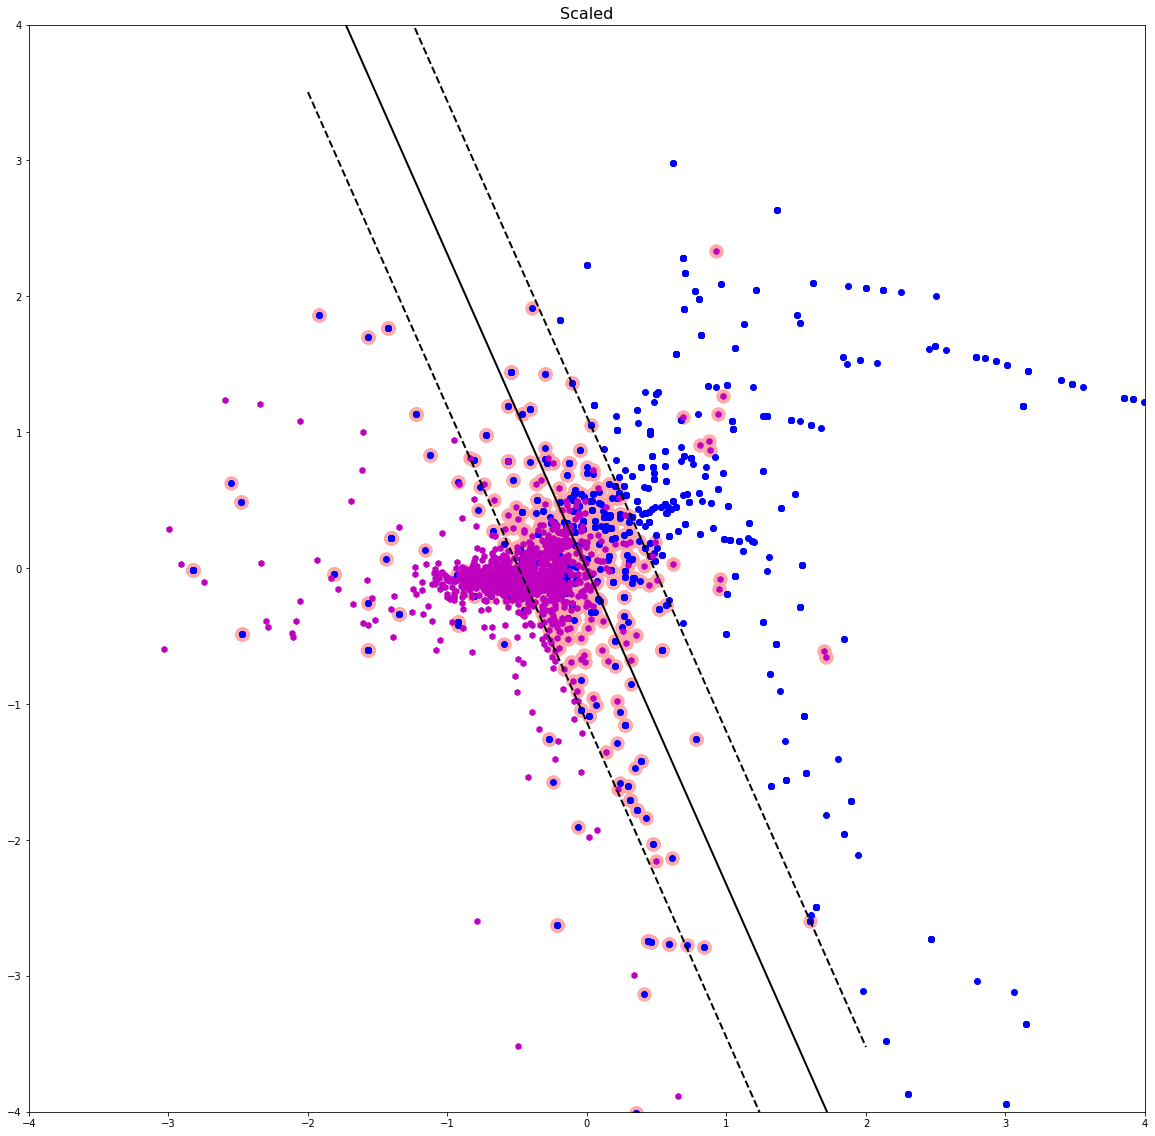

In [42]:
plt.figure(figsize=(20,20))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train[:,[2,27]])
svm_clf_lin.fit(X_scaled, y_train) 

plt.plot(X_scaled[:, 0][y_train==1], X_scaled[:, 1][y_train==1], "bo")
plt.plot(X_scaled[:, 0][y_train==0], X_scaled[:, 1][y_train==0], "mh")
plot_svc_decision_boundary(svm_clf_lin, -2, 2)
plt.title("Scaled", fontsize=16)
plt.axis([-4,4, -4, 4])

In [46]:
confusion_matrix(y_test, y_predict_lin)

#this matrix has a nice balance of values, but it has a lot of false negatives

array([[269,   3],
       [ 49, 248]], dtype=int64)

In [47]:
confusion_matrix(y_test, y_predict_rbf)

#this minimizes false positives, which is awesome

array([[272,   0],
       [ 31, 266]], dtype=int64)

In [48]:
confusion_matrix(y_test, y_predict_poly)

# I have no idea why this matrix is so balanced compared to the others

array([[152, 120],
       [ 80, 217]], dtype=int64)

## Observations

The dataset was horribly unbalanced when we started, but resampling helped the split get good values to be able to train on, almost like copying each instance of fraud a few more times into the dataset to strengthen it's knowledge of fraud.

<br>It was very hard to get the linear set to look correct in the graph, but I think I found two sets that represent well and classify well.

<br>The Confusion matrices helped get an idea of the effectiveness of each method. RBf seems to be the best, considering it minimizes the false negatives.

<br>Poly took a very long time to run on the normal split. After finding the time complexity, I ran it on a much, much smaller portion of the data.

<br>Of all the methods, I think RBF is the best for this set. It has the least false-negatives, meaning the least amount of skipped transactions that were actually fraud. In my opinion, it is far better to falsly flag a transcation as fraud and talk with the account holder than to flag it as not fraud while the holder's account is compromised.

## Conclusion

This assignment taught mne a lot! I know a lot more about kernels in general and how they project data.

I've found RBF to be very useful on non-linear datasets, it helps increase the dimesions and seperate the data that is non-linear.

I'm still confused on what polynomial SVM does, but with a little research I can cure that confusion.

I also gained a lot of understanding of the matplotlib during the assignment, I wanted to use meshplots but couldn't get them to wokr well. I hope to implement them into my next assignment.